In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For clustering
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# For taking a smaller part of dataset
from sklearn.cluster import MiniBatchKMeans
from sklearn.utils import shuffle

In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\juant\OneDrive\Documents\DTU\Computational_Tools_For_Data_Science\ctfcs_project\clustering


In [ ]:
print("Files and directories in the current directory:", os.listdir('.'))

In [ ]:
print("Files in 'data' directory:", os.listdir("../data"))

In [3]:
# Read CSV files from 'data' directory
csv_files = glob.glob(os.path.join("../data", "*.csv"))

In [4]:
# Generate Pandas DataFrames from CSV files
df_all = [pd.read_csv(file) for file in csv_files]

In [5]:
# Concatenate DataFrames
df = pd.concat(df_all, ignore_index=True)

In [6]:
# Drop 'tail_number' column (due to missing values and insignificance)
df = df.drop(['tail_number'], axis=1)

In [7]:
# Drop rows with any missing values across all columns other than the departure and arrival columns (cancelled flights)
df = df.dropna(subset=df.columns.difference(['actual_departure_dt', 'actual_arrival_dt']))

# KMEANS

In [8]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.utils import shuffle

# Sampling a subset of data for clustering (10% of the data)
df_sample = df.sample(frac=0.1, random_state=42)

In [9]:
# Feature selection
selected_features = ['departure_delay', 'arrival_delay', 'HourlyWindSpeed_x', 'HourlyVisibility_x']
df_selected = df_sample[selected_features].astype('int32')

In [10]:
print(df_selected)

         departure_delay  arrival_delay  HourlyWindSpeed_x  HourlyVisibility_x
2222854              302            307                  6                  10
1982272               -7            -18                  7                  10
36567                  4             -9                 10                  10
4450760               -4             -1                 13                   4
650938                -5            -20                 10                  10
...                  ...            ...                ...                 ...
2383758                0              0                  7                   3
4058385               -2            -15                  8                   8
4653681               -7            -27                  8                   6
2312444              -11              0                 14                  10
3725039              128            118                  8                  10

[549284 rows x 4 columns]


In [11]:
# Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected)

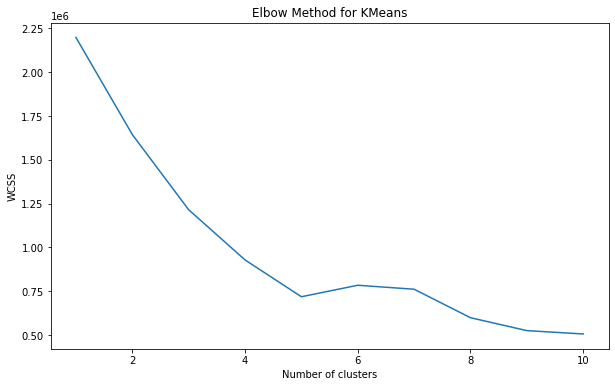

In [12]:
# KMeans Clustering
# MiniBatchKMeans for large datasets
wcss = []
for i in range(1, 11):
    mb_kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=300, batch_size=100, random_state=42)
    mb_kmeans.fit(scaled_features)
    wcss.append(mb_kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
optimal_k = 3  # Based on the Elbow Method
mb_kmeans = MiniBatchKMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, batch_size=30, random_state=42)
kmeans_labels = mb_kmeans.fit_predict(scaled_features)

# Add KMeans cluster labels to the DataFrame
df_sample['kmeans_cluster'] = kmeans_labels

In [14]:
# Analysis and Visualization of Clustering Results
def plot_clusters(df, cluster_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='departure_delay', y='HourlyWindSpeed_x', hue=cluster_column)
    plt.title(title)
    plt.show()

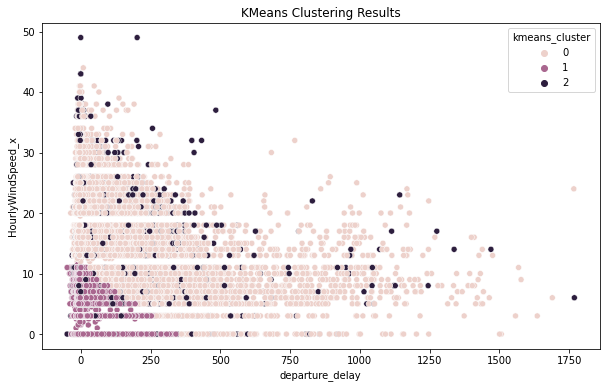

In [15]:
plot_clusters(df_sample, 'kmeans_cluster', 'KMeans Clustering Results')

In [22]:
from KMeans_custom import KMeans_custom

# Using custom KMeans
kmeans_custom = KMeans_custom(K=3)
kmeans_custom_clusters = kmeans_custom.fit(scaled_features)
df_sample['kmeans_custom_cluster'] = kmeans_custom_clusters

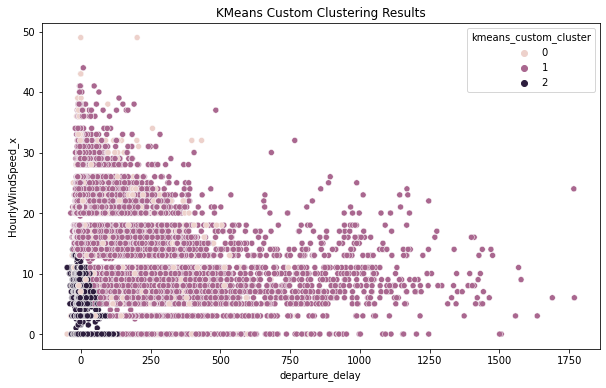

In [23]:
plot_clusters(df_sample, 'kmeans_custom_cluster', 'KMeans Custom Clustering Results')

# Hierarchical Clustering

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Standardization on this sampled data
scaler = StandardScaler()
scaled_features_hc = scaler.fit_transform(df_selected[selected_features])

# Hierarchical Clustering on the sampled and scaled data
# Calculate the linkage matrix using the 'ward' method
linkage_matrix = linkage(scaled_features_hc, method='ward')

MemoryError: Unable to allocate 1.10 TiB for an array with shape (150856181686,) and data type float64

In [40]:
# Plotting the dendrogram based on the linkage matrix
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering on Sampled Data')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

NameError: name 'linkage_matrix' is not defined

<Figure size 720x504 with 0 Axes>

In [41]:
# Hierarchical Clustering
# Plotting the dendogram to find the number of clusters
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

MemoryError: Unable to allocate 1.10 TiB for an array with shape (150856181686,) and data type float64

<Figure size 720x504 with 0 Axes>

In [42]:
# Choose the number of clusters from the Dendrogram and apply Agglomerative Clustering
optimal_clusters_hc = 3  # Example value, adjust based on Dendrogram
hc = AgglomerativeClustering(n_clusters=optimal_clusters_hc, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_features)
df_sample['hierarchical_cluster'] = hc_labels


MemoryError: Unable to allocate 1.10 TiB for an array with shape (150856181686,) and data type float64

In [ ]:
# Plotting results Hierarchical
plot_clusters(df_sample, 'hierarchical_cluster', 'Hierarchical Clustering Results')

In [ ]:
from hierarchical_custom import HierarchicalClustering

# Using custom HierarchicalClustering
hierarchical_custom = Hierarchical_custom(n_clusters=3)  # Adjust the number of clusters as needed
hierarchical_custom_clusters = hierarchical_custom.fit_predict(scaled_features)
df_sample['hierarchical_custom'] = hierarchical_custom_clusters


In [ ]:
plot_clusters(df_sample, 'hierarchical_custom', 'Hierarchical Custom Results')

# DBSCAN

In [43]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
df_sample['dbscan_cluster'] = dbscan_labels

In [ ]:
# Plotting results DBSCAN
plot_clusters(df_sample, 'dbscan_cluster', 'DBSCAN Clustering Results')

In [ ]:
from DBSCAN_custom import DBSCAN

dbscan_custom = DBSCAN(eps=0.5, min_samples=5)
dbscan_custom_labels = dbscan_custom.fit(scaled_features)

# The labels_ attribute will contain the cluster labels
df['dbscan_custom'] = dbscan_custom_labels

In [ ]:
# Plotting results DBSCAN custom
plot_clusters(df_sample, 'dbscan_custom', 'DBSCAN Clustering Results')